In [95]:
import cv2
import numpy as np
import os
import glob
from PIL import Image
#import matplotlib.pyplot as plt
import IPython
from IPython.display import display

In [101]:
def show(img):
    
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret
    IPython.display.display(i)
    

def morph(img,filename):
    
    # KERNEL FOR EROSION
    kernel = np.ones((10,10), np.uint8) 
    
    
    img_erosion = cv2.erode(img, kernel, iterations=4) 
    #img_erosion = cv2.dilate(img_erosion, kernel, iterations=1) 
    
    img_erosion_gaussian = cv2.GaussianBlur(img_erosion,(5,5),0)
    
    #img_erosion_g = cv2.fastNlMeansDenoisingColored(img_erosion_g,None,10,10,7,21)
    #img_erosion_g = cv2.filter2D(img_erosion,-1,kernel_g)
    
    
    #OFFLINE IMAGE FROM DATABASE
    print('OFFLINE IMAGE FROM DATABASE')
    Ground_Truth = Image.open(str(filename) + '.tiff')
    display(Ground_Truth)
    
                              
        
    

    #OFFLINE IMAGE GENERATED
    print('OFFLINE IMAGE GENERATED')
    #im2 = Image.open(img_erosion_gaussian)
    show(img_erosion_gaussian)
    
    #cv2.namedWindow('Output', cv2.WINDOW_NORMAL) 
    #cv2.imshow('Output', img_erosion_gaussian)
    #cv2.waitKey(0)  
    #cv2.destroyAllWindows() 

In [102]:
def extract(files):
    X = []
    Y = []

    filename = files.split('.')[0]
    with open(files, "r") as f:
        
        lines = f.readlines()
        #lines = lines.strip('\n')
    
        for l in lines[10:-1]:
            
            if l[0] != '.':
            #if l[0] != '.' and l[0] != '-':
                
                
                #------UNCOMMENT FOR TAMIL SCRIPT-------------
                y_coord = int(l.split(' ')[0])
                x_coord = int(l.split(' ')[1])
                #------------------------------------
                
                #------UNCOMMENT FOR DEVANAGRI SCRIPT---------
                #x_coord = l.split(',')[1]
                #x_coord = int(X.split('.')[0])
                #y_coord = l.split(',')[0]
                #y_coord = int(Y.split('.')[0])
                #------------------------------------
                
                X.append(x_coord)
                Y.append(y_coord)
    
    height_x = max(X) - min(X)    # HEIGHT OF X
    height_y = max(Y) - min(Y)    # HEIGHT OF Y
    MIN_X = min(X)
    MIN_Y = min(Y)
    
    # SUBTRACTING MIN OF X AND Y CO-ORDINATES
    for i in range(len(X)):
        X[i] = X[i] - MIN_X
        Y[i] = Y[i] - MIN_Y
        
    #print(max(x),max(y),min(x),min(y))
    
    # MATRIX FOR STORING IMAGE - INITIALLY EMPTY
    IMAGE = np.full((height_x + 100,height_y + 100),255, np.uint8)
    
    for i in range(len(X)):
        IMAGE[X[i]+50 , Y[i]+50] = 0   # INCLUDING THE CO-ORDINATE
        
        #-----TRIED DIDN'T WORK!-----------------
        #slopey = Y[i+1] - Y[i]
        #slopex = X[i+1] - X[i]
        #alpha = 0.2
        #while X[i]+ (slopex*alpha) < X[i+1] and Y[i]+ (slopey*alpha) < Y[i+1]:
            #IMAGE[X[i]+ int(slopex*alpha) + 50, Y[i]+ int(slopey*alpha) + 50] = 0
        #----------------------------------------    
        
        # INCLUDING MID-POINT IN BETWEEN TWO CO-ORDINATES    
        if (i + 1) < len(X):
            a1 = int((X[i] + X[i+1])/2) + 50
            b1 = int((Y[i] + Y[i+1])/2) + 50
        IMAGE[a1,b1] = 0
    
    morph(IMAGE,filename)

OFFLINE IMAGE FROM DATABASE


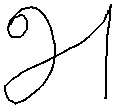

OFFLINE IMAGE GENERATED


AttributeError: 'Image' object has no attribute 'reshape'

In [103]:
def main():
    
    #for files in glob.glob("Hindi/*"):
    for files in glob.glob("Tamil/*txt"):
        extract(files)

if __name__ == "__main__": 
    main()

In [40]:
X = x
y = y

In [19]:
from scipy.interpolate import interp1d

#Ax=np.array([x])
#Ay=np.array([y])
#Ax = np.asarray(Ax).squeeze()
#Ay = np.asarray(Ay).squeeze()


# Combine lists into list of tuples
points = zip(x, y)
# Sort list of tuples by x-value
points = sorted(points, key=lambda point: point[0])
Ax, Ay = zip(*points)

Ax = list(Ax)
Ay = list(Ay)
#Ax=np.array([Ax])
#Ay=np.array([Ay])
#Ax = np.asarray(Ax).squeeze()
#Ay = np.asarray(Ay).squeeze()


x_new = np.linspace(Ax.min(), Ax.max(),500)

f = interp1d(Ax, Ay, kind='quadratic')
y_smooth=f(x_new)

plt.plot (x_new,y_smooth)
plt.scatter (Ax, Ay)

AttributeError: 'list' object has no attribute 'min'

In [ ]:
# Combine lists into list of tuples
points = zip(Ax, Ay)

# Sort list of tuples by x-value
points = sorted(points, key=lambda point: point[0])

Ax, Ay = zip(*points)


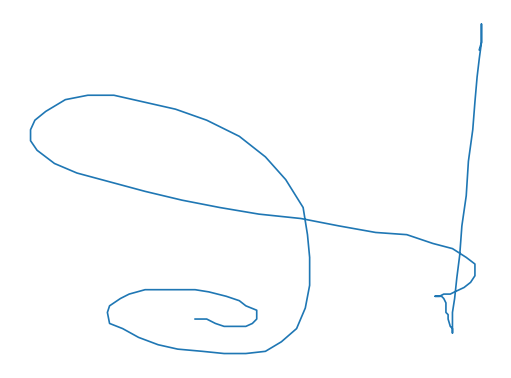

<Figure size 432x288 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(8,6),dpi=80,facecolor = 'w')
f = open("000t01.txt",'r')
lines = f.readlines()

x=[]
y=[]
f=0

def draw(x,y):
    plt.plot(x,y)
    plt.axis('off')
    plt.show()
    #plt.draw()
    plt.savefig('testy.png', dpi=100)
    #fig = plt.figure()
    #plt.save()
    #plt.show()
for line in lines:
    l = line.split()
    if(len(l)>0):
        if(l[0]=='.PEN_DOWN'):
            f=1
            continue
        elif(l[0]=='.PEN_UP'):
            f=0
            draw(x,y)
            continue
    if(f==1):
        x.append(int(l[0]))
        y.append(int(l[1]))

In [ ]:


with open("003t02.txt", "r") as f:
    lines = f.readlines()
    
    # Loop through all lines, ignoring header.
    # Add last element to list (i.e. the process name)
    #print(lines)
    for l in lines[9:-1]:
        #x.append(l.split(" ")[0])
        #y.append(l.split(" ")[1])
        #t.append(l.split(" ")[2])
        #print(l.split(' ')[0])
        if l[0] != '.':
            x.append(int(l.split(' ')[1]))
            y.append(int(l.split(' ')[0]))
#x = [int(numeric_string) for numeric_string in x]
#x = [int(numeric_string) for numeric_string in x]

In [ ]:
print(len(x))
print(len(y))
print(max(x))
print(max(y))

In [ ]:
x1 = max(x)
y1 = max(y)
x0 = min(x)
y0 = min(y)
hx = x1 - x0
hy = y1 - y0
#arr = np.full((len(x),2),255, np.uint8)
#arr[1,1]
for i in range(len(x)):
    x[i] = x[i] - x0
    y[i] = y[i] - y0
    #x[i] = x[i] 
    #y[i] = y[i] 
    #arr[i,0] = x[i] + 5
    #arr[i,1] = y[i] + 5
print(x0)

In [ ]:
mat = np.full((hx + 10,hy + 10),255, np.uint8)

#mat = np.full((x1+2,y1+2),255, np.uint8)

print(hx,hy)

In [ ]:
#print(mat)

In [ ]:
x = []
y = []
t = []
count = 0
for i in range(len(x)):
    #print(x[i],y[i])
    #mat[x[i]+5,y[i]+5] = 0
    mat[x[i],y[i]] = 0
    #if (i + 1) < len(x):
        #a = int((x[i] + x[i+1])/2) + 5
        #b = int((y[i]+y[i+1])/2) + 5
        #mat[a,b] = 0
    #count += 1
#print(count)


In [ ]:
#np.set_printoptions(threshold=sys.maxsize)
#print(mat)

In [ ]:
img = Image.fromarray(mat)
#print(img)
#img.save("C:\\Users\\Dell\\Desktop\\img","png")
img.save('test1.png')
img.show()


#plt.imshow(mat)
#plt.savefig('a')

'''

from scipy.misc import imsave
# x is the array you want to save 
imsave("image.png", mat)
'''

In [ ]:
# Taking a matrix of size 5 as the kernel 
kernel = np.ones((15,15), np.uint8) 
  
# The first parameter is the original image, 
# kernel is the matrix with which image is  
# convolved and third parameter is the number  
# of iterations, which will determine how much  
# you want to erode/dilate a given image.
img = cv2.imread('test1.png')
img_erosion = cv2.erode(img, kernel, iterations=3) 
#img_dilation = cv2.dilate(img, kernel, iterations=1) 
  
#cv2.imshow('Input', img) 
cv2.imshow('Erosion', img_erosion) 
#cv2.imshow('Dilation', img_dilation)
cv2.waitKey(0)  
cv2.destroyAllWindows()  

In [ ]:
kernel = np.ones((5,5), np.uint8) 
img_dilation = cv2.dilate(img_erosion, kernel, iterations = 1)
cv2.imshow('Dilation', img_dilation)
cv2.waitKey(0)  
cv2.destroyAllWindows()  

In [ ]:
'''
isClosed = True
  
# Blue color in BGR 
color = (0, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
  
# Using cv2.polylines() method 
# Draw a Blue polygon with  
# thickness of 1 px 
img = cv2.polylines(img, np.int32([arr]),  isClosed, color, thickness) 
'''

In [ ]:
'''
img = img_erosion
#img = cv2.imread('test1.jpg')
#cv2.imshow('img', img)
#cv2.waitKey(0) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray = img
ret, threshold = cv2.threshold(gray,150,255,cv2.THRESH_BINARY)
cv2.bitwise_not(threshold, threshold)
contours, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
listx = []
listy=[]

for i in range(0, len(contours)):
    c = contours[i]
    size = cv2.contourArea(c)
    if size < 1000:
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        listx.append(cX)
        listy.append(cY)

listxy = list(zip(listx,listy))
listxy = np.array(listxy)

for i in range(0, len(listxy)):    
    x1 = listxy[i,0]
    y1 = listxy[i,1]
    distance = 0
    secondx = []
    secondy = []
    dist_listappend = []
    sort = []   
    for j in range(0, len(listxy)):      
        if i == j:
            pass     
        else:
            x2 = listxy[j,0]
            y2 = listxy[j,1]
            distance = np.sqrt((x1-x2)**2 + (y1-y2)**2)
            secondx.append(x2)
            secondy.append(y2)
            dist_listappend.append(distance)               
    secondxy = list(zip(dist_listappend,secondx,secondy))
    sort = sorted(secondxy, key=lambda second: second[0])
    sort = np.array(sort)
    cv2.line(img, (x1,y1), (int(sort[0,1]), int(sort[0,2])), (0,0,255), 2)

cv2.imshow('img', img)
cv2.waitKey(0)  
cv2.destroyAllWindows()  
#cv2.imwrite('connected.png', img)
'''

In [5]:
import tifffile as tiff
import cv2
a = tiff.imread('001t01.tiff')
print(a)
cv2.imshow('aa',a)
cv2.waitKey(0)  
cv2.destroyAllWindows()  


[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


TypeError: Expected Ptr<cv::UMat> for argument 'mat'

In [12]:
import libtiff

im = Image.open('001t01.tiff')
tif = libtiff.TIFF.open('001t01.tiff')
im = tif.read_image()
# im only contains one of the three channels. im.dtype is uint16 as desired.
im = []
im = np.array(cv2.imread('001t01.tiff'))

ModuleNotFoundError: No module named 'libtiff'

In [24]:
from skimage.io import imread
img = imread("001t01.tiff",1)
imwrite("001t01.png", img)

NameError: name 'imwrite' is not defined

<PIL.TiffImagePlugin.TiffImageFile image mode=1 size=193x202 at 0x2713F1D8E08>
